In [1]:
%matplotlib inline
### Interactive medword testing tool ###

import medword_pipeline
import embedding_fasttext
import embedding_word2vec
import shared.load_config 
import json
import pylab
import os
import model_validation as mv
import preprocess as pp

In [2]:
### define filepaths and names ###
#
# Note: the embedding model must fit the embedding_method in 
#       the config file ("word2vec" or "fasttext")
# 

# where to get the configuration file corresponding to the embedding model
config_data_dir = 'data/embeddings/emb4/'
config_filename = 'emb_model_w2v_4_configuration.json'


# where to get the trained embedding model
emb_model_dir = 'data/embeddings/emb4/'
emb_model_filename = 'emb_model_w2v_4.bin'


# Load configuration (don't change)
config_src = os.path.join(config_data_dir, config_filename)
config = shared.load_config.Configuration(config_src)

In [4]:
### initialize embedding object (don't change)
if config.config['embedding_method'] == 'fasttext':
    embedding = embedding_fasttext.EmbeddingFasttext(config)

elif config.config['embedding_method'] == 'word2vec':
    embedding = embedding_word2vec.EmbeddingWord2vec(config)

else:
    print('embedding_algorithm (in config) must be "fasttext" or "word2vec"')
    raise AttributeError

    
### Load model (don't change)
embedding.load_model(emb_model_dir, emb_model_filename)
print("Model loaded.")

Model loaded.


In [5]:
### Get model information ###
print("vocab size:", len(embedding.get_vocab()))
print("vector dim:", embedding.vec_dim())

vocab size: 584831
vector dim: 150


In [6]:
### Play with model ###

# define a word from which you like to see it's n-nearest neighbours 
# in the embedding space
word = 'arzt'
n_nearest_neighbours = 10

# check if word is in model vocab
print("word is in model vocab: ", word in embedding.get_vocab())

# create list of neighbours
embedding.most_similar_n(word, n_nearest_neighbours)

word is in model vocab:  True


[('hausarzt', 0.7083759719272735),
 ('einweisende', 0.7014030413022272),
 ('behandelnde', 0.6947822577577334),
 ('darzt-rezept', 0.6834899853247314),
 ('gkv-versicherter', 0.6832060187451043),
 ('unterschreibt', 0.6763688425610666),
 ('heilhilfsberufe', 0.6760111969065752),
 ('eilfall', 0.6757200643686898),
 ('unterschreibe', 0.6755855001100888),
 ('konsiliargespräch', 0.6743831698015321)]

In [7]:
### Analogy

# embedding.analogy([positives], [negatives], topn)
embedding.analogy(['koenig', 'frau'], ['mann'], 10)

[('jeanine', 0.26620751310760143),
 ('landsberger', 0.2660433696237113),
 ('80639', 0.2656330931007473),
 ('dipl-soz-päd', 0.2637328793164403),
 ('warmuth', 0.2632840142348419),
 ('10585', 0.26105168439033044),
 ('48161', 0.26072782732789107),
 ('80339', 0.2598002194313916),
 ('inka', 0.25894442852951605),
 ('klinikstrasse', 0.25826217955434494)]

In [8]:
# Get a vector of a word
vec = embedding.word_vec('das')

print(vec[:10])

[ 0.08220343  0.08810184 -0.05436552 -0.1531591   0.02436036 -0.13343668
  0.06235622  0.09080388  0.05949959  0.00184021]


In [9]:
### Validation of the embedding model ###

# where to get the validation data
config.config['val_data_dir'] = 'data/validation_data/'

# Choose DOESNTFIT test file from your validation folder
# note: - the doesntfit file has a 'question' on each line
#       - a 'question' is of the format 
#       
#         word_1 word_2 word_3 ... word_N word_not_fitting
#        
#         -> word_1 to word_N belong to a category but word_not_fitting doesn't
# 
#         Example question:
# 
#         Auto Motorrad Fahrrad Fußgänger
#
#
config.config['doesntfit_file'] = 'german_doesntfit1.txt'


# Choose SYNONYM test file from your validation folder
# note: - the synonym file has a 'question' on each line
#       - a 'question' is of the format 
#       
#         word_1 word_2 
#        
#         -> word_1 and word_N are synonyms
# 
#         Example question:
# 
#         Blutgerinnsel Thrombus
#
# 
config.config['synonyms_file'] = 'german_synonyms3.txt'


mv.validate_model(embedding, emb_model_dir, emb_model_filename)

Start validation. Loading model. 

Validating 'doesntfit' with file data/validation_data/german_doesntfit1.txt

*** Doesn't fit ***
Doesn't fit correct:  76.8% (76/99)
Doesn't fit coverage: 90.0% (99/110) 


*** Human-Similarity ***
Number of instances: 636, skipped: 143
random error: 0.29851118826, mean error: 0.244944473289


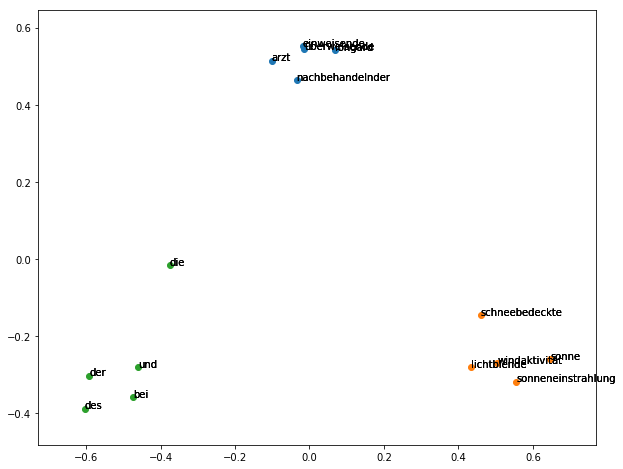

In [13]:
### Visualization ###
# From a list of words, plot all words and it's neighbours 

# define the words you would like to visualize
word_list = ['arzt', 'sonne', 'der']

# define the number of closest neighbors to display per word
n_nearest_neighbours = 4

# change figure size if desired
width = 10.0
height = 8.0
pylab.rcParams['figure.figsize'] = (width, height)

# plotting
mv.visualize_words(embedding, word_list, n_nearest_neighbours)

In [10]:
### test your used tokenizer ###

tokenizer = pp.get_tokenizer(config)
example = """!! „asdf“ 'asdf' abk. hey "asdf" ??Ein Arzt bzw. eine Ärztin ist ein medizinisch\n \n 
             ausgebildeter Heilkundiger, beschäftigt sich mit der
             Vorbeugung (Prävention), [Erkennung] (Diagnose),
             Behandlung (Therapie) [...] und Nachsorge von Krankheiten
             und Leiden bzw. gesundheitlichen Beeinträchtigungen,
             und stellt sich">
             damit in den Dienst der Gesundheit.
             
             stae-asdf"""
             
tk_example = tokenizer.tokenize(str(example))

print(tk_example)

['asdf', 'asdf', 'abk', 'hey', 'asdf', 'ein', 'arzt', 'bzw', 'eine', 'ärztin', 'ist', 'ein', 'medizinisch', 'ausgebildeter', 'heilkundiger', 'beschäftigt', 'sich', 'mit', 'der', 'vorbeugung', 'prävention', 'erkennung', 'diagnose', 'behandlung', 'therapie', 'und', 'nachsorge', 'von', 'krankheiten', 'und', 'leiden', 'bzw', 'gesundheitlichen', 'beeinträchtigungen', 'und', 'stellt', 'sich', 'damit', 'in', 'den', 'dienst', 'der', 'gesundheit', 'stae-asdf']


In [11]:
import importlib
importlib.reload(mv)
file_src = 'data/validation_data/human_similarity.csv'